# AB testing

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('data.csv')

In [15]:
exp_data = data[data['group'] == 'exp']

In [7]:
con_data = data[data['group'] == 'con']

## Visualize the data

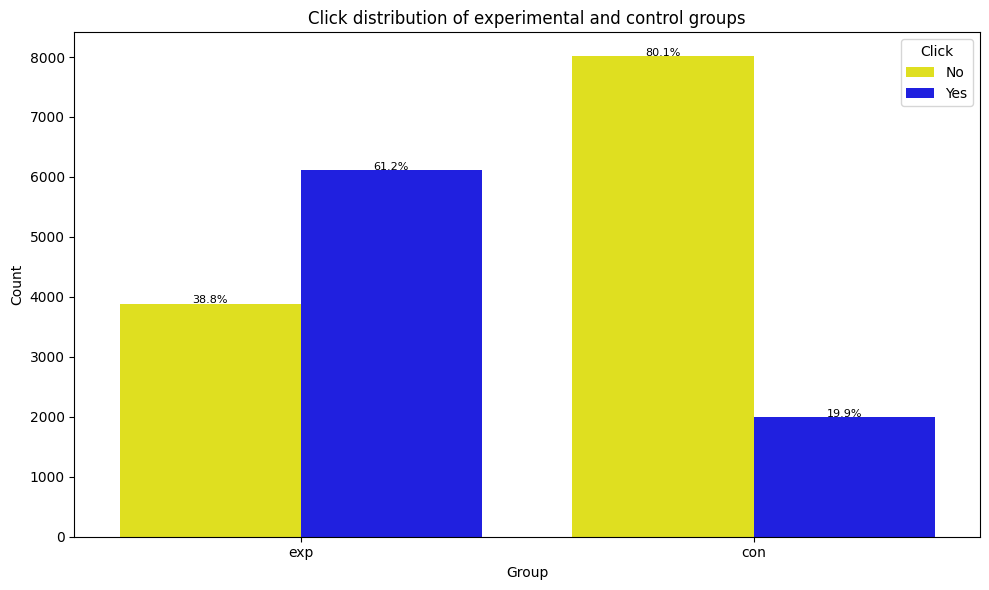

In [66]:
plt.figure(figsize=(10,6))
sns.countplot(x='group',hue='click',data=data,palette={0:'yellow',1:'blue'})
plt.title("Click distribution of experimental and control groups")
plt.xlabel("Group")
plt.ylabel("Count")
plt.legend(title='Click' ,labels=['No',"Yes"])

#Add the percentage labels
group_count = data.groupby('group').size()
group_click_count = data.groupby(['group','click'])

#Get the axes
ax= plt.gca()

for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x,y = p.get_xy()
    group = 'exp' if x<0.5 else 'con'
    click = 1 if x % 1 > 0.5 else 0
    total = group_count.loc[group]
    percentage = height/total * 100
    if height>0:
      ax.text(x+width/2, height+6, f'{percentage:.1f}%',ha='center',size=8)

plt.tight_layout()
    

## Parameters of the model

 * &beta; : Probability of **Type-II error**
 * 1-&beta; : **Power** of the test
 * &alpha; : Probability of **Type-I error** or level of significance
 * &delta; : Minimum Detectable effect (**MDE**)

In [68]:
alpha = 0.05
delta = 0.1

In [103]:
X_con = con_data[con_data['click'] == 1].count().loc['click']
N_con = con_data.count().loc['user_id']

In [105]:
X_con 

np.int64(1989)

In [108]:
N_con

np.int64(10000)

In [106]:
X_exp = exp_data[exp_data['click']==1].count().loc['click']
N_exp = exp_data.count().loc['user_id']

In [107]:
X_exp

np.int64(6116)

In [109]:
N_exp

np.int64(10000)

## Calculating estimates
**CTR = $\frac{\text{No of Clicks}}{\text{No of Impressions}}$**


In [110]:
p_con = X_con/N_con

In [111]:
p_con

np.float64(0.1989)

In [114]:
p_exp = X_exp/N_exp

In [115]:
p_exp

np.float64(0.6116)